# Tensorflow vs. Sklearn - Comparison of linear classifiers
[B2]

How to survive on the Titanic?
Long time I was thinking, that this sample is a something as any railway statistic or other theoretical base. When I realise, that it is real list of Titanic passengers any investigations with it became more exciting.
Let's see ones again what we can see in the data about this apocaliptic catastrof.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('c:/1/kaggletrain.csv', skipinitialspace=True, index_col=False)
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
del df['Cabin']
del df['Ticket']
del df['Unnamed: 0']
del df['PassengerId']

I removed the Cabin column, I also removed the 'Ticket' column, I think the ticket number did not affect the survival of the flight.
Now I will delete records where values are missing in the 'Embarked' and 'Age' columns.

In [3]:
df = df.dropna(how='any')

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Incomplete records have been deleted. I am researching other independent variables.

In [5]:
df.Embarked.value_counts(normalize=True)

S    0.778090
C    0.182584
Q    0.039326
Name: Embarked, dtype: float64

In [6]:
df.Sex.value_counts(normalize=True)

male      0.636236
female    0.363764
Name: Sex, dtype: float64

The SibSp variable is quite enigmatic, let's check it out!

In [7]:
df.SibSp.value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

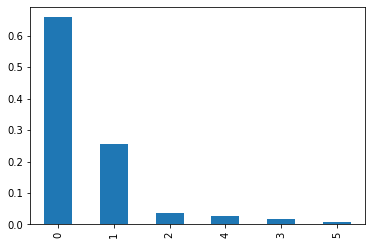

In [8]:
df.SibSp.value_counts(normalize=True).plot(kind='bar')

As we can see, 469 passengers travel alone and 183 passengers with one family member.

## Analysis of balancing the set of result variables
I will not examine variables anymore, I will only check if the dependent variable is balanced. Is the number of rescued and victims similar. The collections must be balanced for successful classification. Fortunately for us as researchers, and unfortunately for us and all mankind, a similar number of people as the number of people saved died on the Titanic.

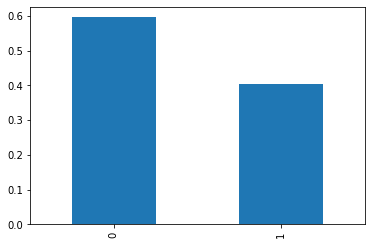

In [9]:
df.Survived.value_counts(normalize=True).plot(kind='bar')

# Sklearn logistic regression 

When building each model, you need to consider all possible data, including (and sometimes above all) text (discrete) data. To use text data, it must be converted to digital data.

#### We divide independent variables into text and numeric ones

In [10]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [11]:
del df['Name']

In [12]:
categorical = df.describe(include=["object"]).columns
continuous = df.describe().columns

In [13]:
categorical

Index(['Sex', 'Embarked'], dtype='object')

In [14]:
continuous

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### We convert discrete variables to digitally coded variables

In [15]:
from sklearn.preprocessing import LabelEncoder

df[categorical] = df[categorical].apply(LabelEncoder().fit_transform)

In [16]:
df[categorical].sample(6)

,Sex,Embarked
630,1,2
683,1,2
690,1,2
841,1,2
886,1,2
806,1,2


#### We divide the collections into test and training

In [17]:
y = df['Survived']
X = df.drop('Survived' , axis=1)

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

In [18]:
print ('Training X set: ',Xtrain.shape)
print ('Test X set      ', Xtest.shape)
print ('Training y set: ', ytrain.shape)
print ('Test y set      ', ytest.shape)

Training X set:  (477, 7)
Test X set       (235, 7)
Training y set:  (477,)
Test y set       (235,)


#### Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

#### Evaluation of the logistic regression model

In [20]:
ypred = LR_Grid.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[118,  22],
       [ 22,  73]], dtype=int64)

In [21]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.77      0.77      0.77        95

    accuracy                           0.81       235
   macro avg       0.81      0.81      0.81       235
weighted avg       0.81      0.81      0.81       235



# Tensorflow classification

In [22]:
import tensorflow as tf

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\pyth

In [23]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Step 1) The data is already divided into a test set and a training set.

In [24]:
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(570, 8) (142, 8)


## Step 2) Change from continuous variables to Tensorflow variables, function:

<span style="color:Blue">tf.feature_column.numeric_column</span>
columns should be converted to a tensor.

You can change one column to the tensor, for example:

In [25]:
Age = tf.feature_column.numeric_column('Age')
Age

_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

You can also change all columns together to tensorflow tensors.

In [26]:
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

continuous_features = [tf.feature_column.numeric_column(k) for k in FEATURES]
continuous_features

[_NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Embarked', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

# Model creation

LinearClassifier The syntax for the linear classifier is the same as for Tensorflow linear regression, except for one argument: n_class. You must define a function column, model catalog and compare with a linear regressor; you have a defined number of classes. For logit regression, the number of classes is 2.

### <span style="color:darkblue">1. Define of classifier</span>



In [27]:
model = tf.estimator.LinearClassifier(
    n_classes = 2,
    model_dir="ongoing/train7", 
    feature_columns=continuous_features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ongoing/train7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BEC31C0EF0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### <span style="color:darkblue">2. Create the input function</span>

After defining the classifier, you can create an input function. The method is the same as in linear regression. Here you use batch size 128 and shuffle the data.

In [28]:
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
LABEL = 'Survived'

def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

### <span style="color:darkblue">3. Train the model</span>


Let's train the model with the model.train object. The function defined earlier is used to supply the model with the appropriate values. Remember that you set the lot size to 128 and the number of epochs to None. The model will be trained in a thousand steps.

In [29]:
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
LABEL = 'Survived'

In [30]:
model.train(input_fn=get_input_fn(df_train, 
                                num_epochs=None,
                                n_batch = 128,
                                shuffle=False),
                                steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ongoing/train7\model.ckpt-4000
INFO:tensorflow:Saving checkpoints for 4001 into ongoing/train7\model.ckpt.
INFO:tensorflow:loss = 54.26442, step = 4001
INFO:tensorflow:global_step/sec: 240.302
INFO:tensorflow:loss = 56.680855, step = 4101 (0.425 sec)
INFO:tensorflow:global_step/sec: 242.323
INFO:tensorflow:loss = 59.817116, step = 4201 (0.417 sec)
INFO:tensorflow:global_step/sec: 268.818
INFO:tensorflow:loss = 57.037727, step = 4301 (0.362 sec)
INFO:tensorflow:global_step/sec: 389.967
INFO:tensorflow:loss = 66.38917, step = 4401 (0.256 sec)
INFO:tensorflow:global_step/sec: 255.206
INFO:tensorflow:loss = 57.90423, step = 4501 (0.397 sec)
INFO:tensorflow:global_step/sec: 314.039
INFO:tensorflow:loss = 65.30669, step = 4601 (0.314 sec)
INFO:tensorflow:global_step/sec: 307.807
INFO:tensorflow:loss = 58.9767, step = 4701 (0.335 sec)
INFO:tensorflow:global_step/sec: 235.529
INFO:tensorflow:loss = 60.323586,

### <span style="color:darkblue">4. Evaluate the performance of model</span>

The final loss after a thousand iterations is 60.84248. You can estimate your model on the test kit and see the performance. You need to use object rating to evaluate your model's performance. You feed the model with the test kit and set the number of epochs to 1, i.e. the data will go to the model only once.

In [31]:
model.evaluate(input_fn=get_input_fn(df_test, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Starting evaluation at 2019-12-11-17:40:50
INFO:tensorflow:Restoring parameters from ongoing/train7\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2019-12-11-17:40:50
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7887324, accuracy_baseline = 0.6549296, auc = 0.86131227, auc_precision_recall = 0.822628, average_loss = 0.44193235, global_step = 5000, label/mean = 0.34507042, loss = 31.377197, prediction/mean = 0.39950997


{'accuracy': 0.7887324,
 'accuracy_baseline': 0.6549296,
 'auc': 0.86131227,
 'auc_precision_recall': 0.822628,
 'average_loss': 0.44193235,
 'label/mean': 0.34507042,
 'loss': 31.377197,
 'prediction/mean': 0.39950997,
 'global_step': 5000}